In [1]:
import numpy as np
import pandas as pd
from scipy import signal, optimize
import matplotlib.pyplot as plt

In [2]:
def func(x,a,b):
    return a*np.exp(b*x)

In [3]:
N = 1001
n1 = N//3 #333
n2 = 2*n1 #666

In [14]:
t = np.linspace(0,10,N)

In [21]:
x0 = func(t[:n1], 1, -0.2)
x1 = func(t[n1:n2]-t[n1], 5, -0.4)
x2 = func(t[n2:]-t[n2], 2, -1.2)

In [31]:
x = np.hstack([x0, x1, x2])
xr = x + 0.025*np.random.randn(x.size)

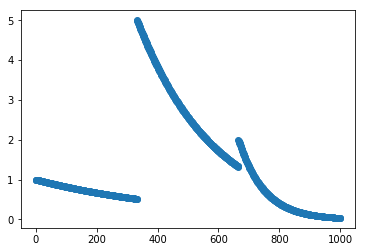

In [38]:
plt.plot(x, 'o')

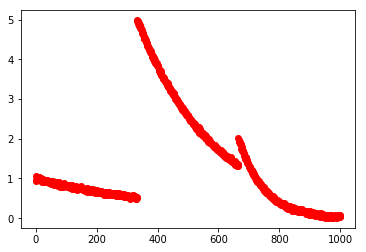

In [39]:
plt.plot(xr, 'ro')

In [40]:
x == xr

array([False, False, False, ..., False, False, False])

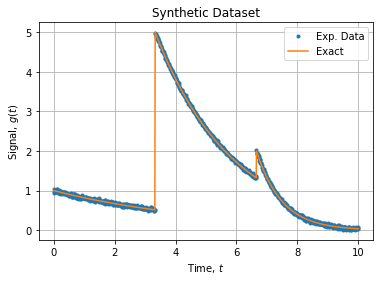

In [41]:
fig, axe = plt.subplots()
axe.plot(t, xr, '.', label='Exp. Data')
axe.plot(t, x, '-', label='Exact')
axe.set_title("Synthetic Dataset")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal, $g(t)$")
axe.legend()
axe.grid()

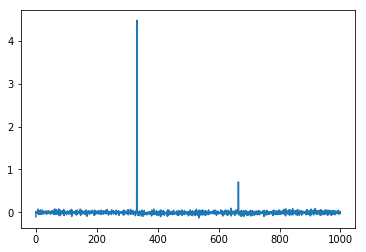

In [43]:
plt.plot(np.diff(xr))

In [51]:
dxrdt = np.abs(np.diff(xr)/np.diff(t))

In [53]:
xcrit = 20

In [54]:
q = np.where(dxrdt > xcrit)

In [61]:
q

(array([332, 665], dtype=int64),)

In [114]:
dxrdt[330:335]

array([2.97512591e-02, 1.52779306e+00, 4.47713817e+02, 2.30608388e+00,
       2.38509134e+00])

In [167]:
idx = [0] + list(q[0]+1) + [t.size]

In [59]:
idx

[0, 333, 666, 1001]

In [64]:
q[0]+1

array([333, 666], dtype=int64)

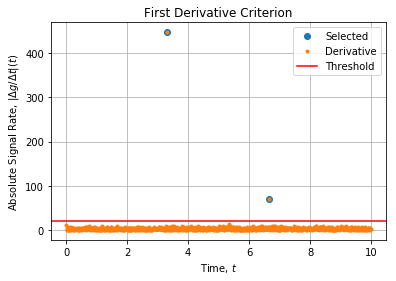

In [65]:
fig, axe = plt.subplots()
axe.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
axe.plot(t[:-1], dxrdt, '.', label='Derivative')
axe.axhline(xcrit, color="red", label='Threshold')
axe.set_title("First Derivative Criterion")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
axe.legend()
axe.grid()

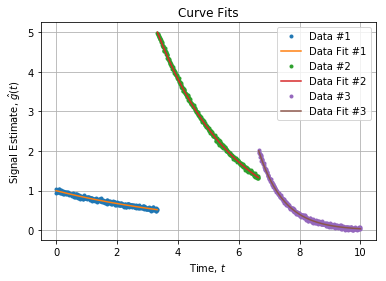

In [66]:
trials = []
fig, axe = plt.subplots()
for k, (i, j) in enumerate(zip(idx[:-1], idx[1:])):
    p, s = optimize.curve_fit(func, t[i:j]-t[i], xr[i:j])
    axe.plot(t[i:j], xr[i:j], '.', label="Data #{}".format(k+1))
    axe.plot(t[i:j], func(t[i:j]-t[i], *p), label="Data Fit #{}".format(k+1))
    trials.append({"n0": i, "n1": j, "t0": t[i], "a": p[0], "b": p[1],
                   "s_a": s[0,0], "s_b": s[1,1], "s_ab": s[0,1]})
axe.set_title("Curve Fits")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal Estimate, $\hat{g}(t)$")
axe.legend()
axe.grid()

In [70]:
df = pd.DataFrame(trials)

In [71]:
df

,a,b,n0,n1,s_a,s_ab,s_b,t0
0,0.997438,-0.197147,0,333,0.000009,-0.000005,3.725809e-06,0.00
1,4.994634,-0.399165,333,666,0.000012,-0.000001,2.976536e-07,3.33
2,2.000956,-1.202175,666,1001,0.000030,-0.000018,2.210951e-05,6.66


In [72]:
print(df)

          a         b   n0    n1       s_a      s_ab           s_b    t0
0  0.997438 -0.197147    0   333  0.000009 -0.000005  3.725809e-06  0.00
1  4.994634 -0.399165  333   666  0.000012 -0.000001  2.976536e-07  3.33
2  2.000956 -1.202175  666  1001  0.000030 -0.000018  2.210951e-05  6.66


In [77]:
idx[:-1]

[0, 333, 666]

In [78]:
idx[1:]

[333, 666, 1001]

## Actual Dataset

In [126]:
df_j = pd.read_csv('C:\\Users\\obinna.izima\\Documents\\Documents from Desktop_14.06.2020\\traces_March 8\\testcurves.csv')

In [136]:
J = df_j['Jitter'][:1001].values

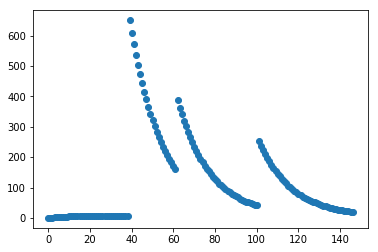

In [137]:
plt.plot(J,'o')

In [138]:
tt = np.linspace(0,10,len(J))

In [139]:
dj_dt = np.abs(np.diff(J)/np.diff(tt))

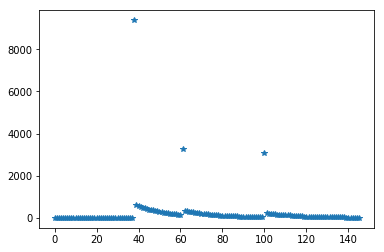

In [140]:
plt.plot(dj_dt,'*')

In [156]:
xx = 750
qq = np.where(dj_dt > xx)

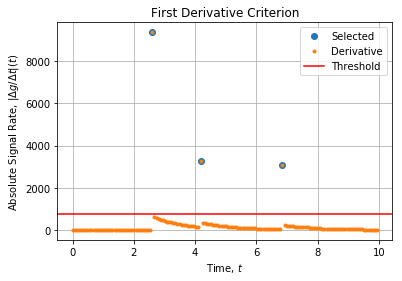

In [157]:
fig, axe = plt.subplots()
axe.plot(tt[qq[0]], dj_dt[qq[0]], 'o', label='Selected')
axe.plot(tt[:-1], dj_dt, '.', label='Derivative')
axe.axhline(xx, color="red", label='Threshold')
axe.set_title("First Derivative Criterion")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
axe.legend()
axe.grid()

In [158]:
idxx = [0] + list(qq[0]+1) + [tt.size] 

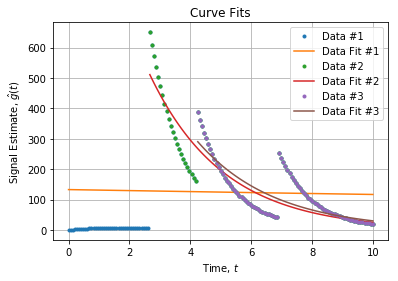

In [160]:
trial = []
fig, axe = plt.subplots()
for k, (i, j) in enumerate(zip(idxx[:-1], idx[1:])):
    pp, ss= optimize.curve_fit(func, tt[i:j]-tt[i], J[i:j])
    axe.plot(tt[i:j], J[i:j], '.', label="Data #{}".format(k+1))
    axe.plot(tt[i:j], func(tt[i:j]-tt[i], *pp), label="Data Fit #{}".format(k+1))
    trial.append({"n0": i, "n1": j, "t0": tt[i], "a": pp[0], "b": pp[1],
                   "s_a": ss[0,0], "s_b": ss[1,1], "s_ab": ss[0,1]})
axe.set_title("Curve Fits")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal Estimate, $\hat{g}(t)$")
axe.legend()
axe.grid()

In [161]:
type(J)

numpy.ndarray

In [166]:
len(xr) 

1001

In [163]:
xr

array([1.05078575, 0.94592108, 0.96765758, ..., 0.06882674, 0.02960862,
       0.04742999])